In [12]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import control as c

## Aufgabe 3
Im Folgenden werden 2 Regler entworfen. Zunächst ein einfacher P Regler, danach ein PI Regler. Die Transferfunktion des P Reglers lautet $ \frac{v(s)}{u(s)} = K $, für den PI Regler gilt $\frac{v(s)}{u(s)} = \frac{K_pK_is+1}{K_is}$



In [13]:
m = 16.49331431
As = 1.256637061
hs = 5
cp = 1078

#charakteristische Formal für das PT1 Verhalten
def func(x, K, T):
     return K*(1 - np.e**(-x/T))

#Kooeffizientenvergleich liefert werte für T und K
q = 2000
q_max = 2000
T = cp*m/(As*hs)
K = q/(As*hs)/q # skaliere k mit eingangsleistung

In [14]:
#transferfunktion von PT1
Gs = c.tf([K],[T,1])
Gs


  0.1592
----------
2830 s + 1

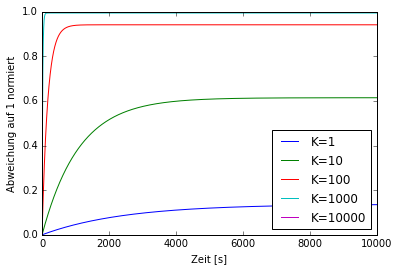

In [36]:
#lege System mit verschiedenen Werten für K an
P_list = [1, 10, 100, 1000]
for k in P_list:
    Gr = c.tf([k],[1])
    tf_controller_output = c.feedback(Gr*Gs)
    step_data = c.step_response(tf_controller_output,np.arange(0,10000,1))
    plt.plot(step_data[0],step_data[1], label="K="+str(k))
        
plt.xlabel('Zeit [s]')
plt.ylabel('Abweichung auf 1 normiert')
plt.legend(loc=4)

Die obrige Grafik zeigt das Verhalten des geschlossenen Regelkreises mit einem P Regler. Für K wurden die Werte 1, 10, 100, 1000 gewählt. Es ist zu erkennen, dass mit höherem K das System schneller und genauer geregelt wird. Für kleine K wie z.B. 10 kann der Zielwert nicht erreicht werden. Da die Regelung der Leistung direkt von K abhängt ist darauf zu achten, dass K so gewählt werden muss, dass die maximale Leistung nicht überschritten wird.


Polnullstellen für k= 1: (array([-0.00040963]), array([], dtype=float64))
Polnullstellen für k= 10: (array([-0.00091583]), array([], dtype=float64))
Polnullstellen für k= 100: (array([-0.00597775]), array([], dtype=float64))
Polnullstellen für k= 1000: (array([-0.05659701]), array([], dtype=float64))


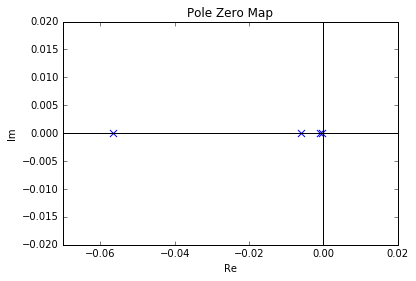

In [40]:
#lege System mit verschiedenen Werten für K an
P_list = [1, 10, 100, 1000]
for k in P_list:
    Gr = c.tf([k],[1])
    tf_controller_output = c.feedback(Gr*Gs)
    a = c.pzmap.pzmap(tf_controller_output) # pole/zero map, Polnullstellendiagram
    print("Polnullstellen für k= "+ str(k) + ": " + str(a))


Bei Betrachtung der Polstellen der für die gewählten Werte für K ist zu erkennen, dass die Realanteile immer negativ sind un die Imaginärteile immer 0. Dadruch sind die betrachteten P Regler stabil für das gegebene System.


     31.83 s + 0.1592
--------------------------
283 s^2 + 31.93 s + 0.1592



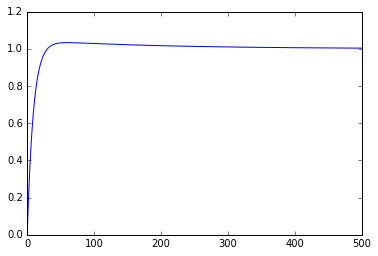

In [67]:
KI=0.1
KP=2000
P = c.TransferFunction(KP,1)
I = c.TransferFunction(1,[KI,0])
# plot controller output
# new feedback for controller output
tf_controller_output = c.feedback((P+I)*Gs)
print(tf_controller_output)
step_data = c.step_response(tf_controller_output,np.arange(0,500,0.1))
plt.plot(step_data[0],step_data[1])

Polnullstellen für k= 1000: (array([-0.10761423, -0.00522641]), array([-0.005]))


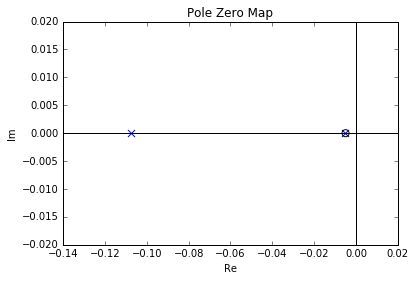

In [68]:
a = c.pzmap.pzmap(tf_controller_output) # pole/zero map, Polnullstellendiagram
print("Polnullstellen für k= "+ str(k) + ": " + str(a))


  1
-----
0.1 s



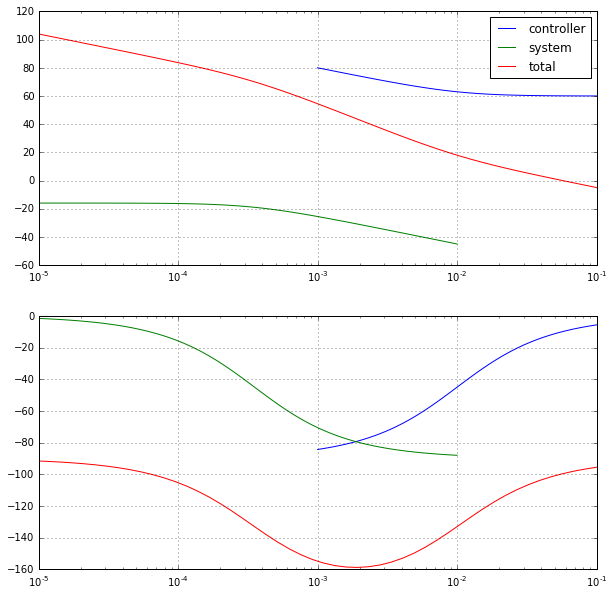

In [235]:

bodeplot_data_PI = c.bode_plot(P+I,dB=True,Plot=False)
bodeplot_data_sys = c.bode_plot(sys,dB=True,Plot=False)
bodeplot_data_total = c.bode_plot((P+I)*sys,dB=True,Plot=False)
plt.figure(figsize=[10,10])
plt.subplot(211)
plt.grid()
#pp.axis([0.1,100,-100,45])
plt.semilogx(bodeplot_data_PI[2],bodeplot_data_PI[0])
plt.semilogx(bodeplot_data_sys[2],bodeplot_data_sys[0])
plt.semilogx(bodeplot_data_total[2],bodeplot_data_total[0])
plt.legend(["controller","system","total"])
plt.subplot(212)
plt.semilogx(bodeplot_data_PI[2],bodeplot_data_PI[1])
plt.semilogx(bodeplot_data_sys[2],bodeplot_data_sys[1])
plt.semilogx(bodeplot_data_total[2],bodeplot_data_total[1])
plt.grid()


     15.92 s + 0.1592
--------------------------
283 s^2 + 16.02 s + 0.1592



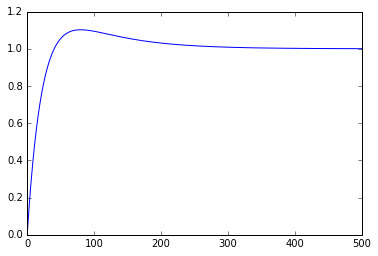

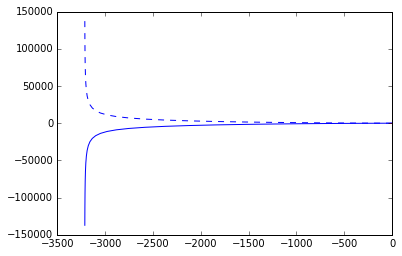

In [237]:
real, img, frequ = c.nyquist_plot((P+I)*Gs.feedback()) # nyquist diagram

(array([-0.04373772, -0.0128593 ]), array([-0.01]))

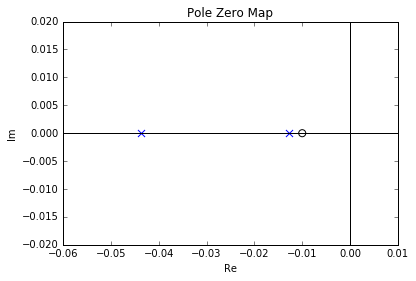

In [238]:
c.pzmap.pzmap(((P+I)*Gs).feedback()) # pole/zero map, Polnullstellendiagram